### Student Details

Student Name: Elsa Anza Martín

Student ID: 21272808


# Task 2: scikit learn

In [2]:
# import dependencies
import numpy as np
import pandas as pd


1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [84]:
df = pd.read_csv('iris_data.csv', header=0)
df

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [85]:
df = df[~df[' class'].isin(['Iris-versicolor'])]

In [86]:
df

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [87]:
################################
# Your code here
# setosa and versicolor
y = df.iloc[:, 4].values
cond = y == 'Iris-setosa'
y = np.where(cond, -1, 1)

# sepal length and petal length
X = df.iloc[:, [2,3]].values

4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

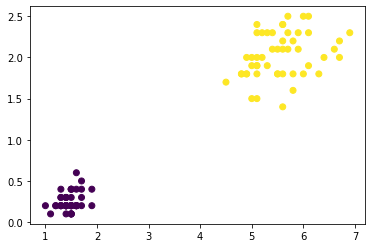

In [88]:
################################
# Your code here
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

It does converge quiclky, as it would be expected in a dataframe of this small size.

In [90]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron as Perceptron 

################################
# Your code here
clf = Perceptron(tol=1e-3, random_state=0, verbose=1)
clf.fit(X, y)

clf.score(X, y)

-- Epoch 1
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 100, Avg. loss: 0.164200
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 700, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.01 seconds


1.0

6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

In [101]:
import random
petal_w = np.random.normal(loc=5, scale=2, size=5000) #loc = mean, scale = std, size = no samples

petal_l = np.random.normal(loc=1.5, scale=2, size=5000) #loc = mean, scale = std, size = no samples

################################
# Your code here
new_X = pd.DataFrame(petal_w, columns=['petal_w'])
new_X['petal_l'] = petal_l
new_X

,petal_w,petal_l
0,5.247425,2.592918
1,2.624006,-1.361319
2,1.294685,2.085356
3,5.604065,6.617612
4,3.074927,1.236675
...,...,...
4995,5.342666,1.911602
4996,5.432494,1.637336
4997,6.813238,0.696644
4998,4.640282,-1.621706


Using the normal distribution from numpy we get the folling data:

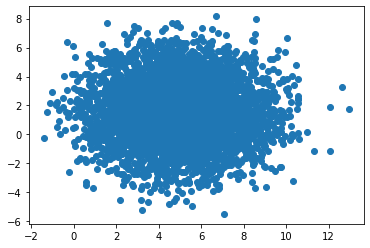

In [96]:
plt.scatter(new_X['petal_w'], new_X['petal_l'])
plt.show()

In [111]:
n_X = zip(new_X['petal_w'].tolist(), new_X['petal_l'].tolist())

In [122]:
n_y = clf.predict(n_X)

After predicting, we plot the data again and the decision boundary can be observed as the diagonal line dividing yellow and purple.

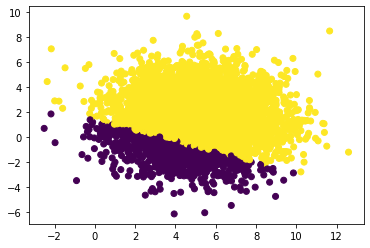

In [153]:
plt.scatter(new_X['petal_w'], new_X['petal_l'], c=n_y)
plt.show()